# Can You Game The Currency Exchange ?

The Riddler - 5/26/2023

#### Question:

As a citizen of Riddler Nation, you are visiting the United States. Upon landing at an American airport, you would like to exchange your 100 Riddlerian rupees for some American currency. Fortunately, you notice a currency exchange station where it might just be possible to make a profit.

The dollar is known to be more valuable than the rupee. Now this station says they will give you D dollars for each rupee, where D is a decimal less than 1 that goes to the hundredths place. So D can be 0.99, 0.50 or 0.37, but not values like 0.117 or 1/𝜋. And when exchanging dollars back into rupees, the station uses an exchange rate of R, where R is equal to 1/D rounded to the nearest hundredth. (Yes, that last part is very important.)

For example, suppose D is 0.53. In this case, when you trade in 100 rupees, you’ll receive $53. When trading the $53 dollars back, the station uses an exchange rate of 1/0.53, or 1.88679…, which they round up to 1.89. And so returning the $53 gets you 100.17 rupees — a net profit!

What value of D will earn you the greatest profit for your 100 rupees? (Remember, D is a decimal that goes to the hundredths place and is less than 1.)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

We define some initial variables as follows:
- `rupees_initial`: all potential starting amounts of Riddlerian rupees
- `dollars_per_rupee`: potential values the exchange rate, D, can take on

In [2]:
rupees_initial = pd.Series([100 for x in range(99)])

dollars_per_rupee = pd.Series(list(range(1, 100, 1)))
dollars_per_rupee = dollars_per_rupee / 100

In [3]:
data = {"rupees_initial": rupees_initial,
        "dollars_per_rupee": dollars_per_rupee}
df = pd.concat(data, axis=1)
df

,rupees_initial,dollars_per_rupee
0,100,0.01
1,100,0.02
2,100,0.03
3,100,0.04
4,100,0.05
...,...,...
94,100,0.95
95,100,0.96
96,100,0.97
97,100,0.98


We can convert our rupees to dollars by multiplying them by, D, the exchange rate. In other words, we multiply the `rupees_initial` column by the `dollars_per_rupee` column.

In [4]:
df['dollars'] = df['rupees_initial'] * df['dollars_per_rupee']
df

,rupees_initial,dollars_per_rupee,dollars
0,100,0.01,1.0
1,100,0.02,2.0
2,100,0.03,3.0
3,100,0.04,4.0
4,100,0.05,5.0
...,...,...,...
94,100,0.95,95.0
95,100,0.96,96.0
96,100,0.97,97.0
97,100,0.98,98.0


We find the exchange rate , R, by inverting D and rounding to two decimal places. In other words, to get the `rupees_per_dollar` column, we invert each entry in the `dollars_per_rupee` column.

In [6]:
df['rupees_per_dollar'] = df['dollars_per_rupee'].apply(lambda x: round(1/x, 2))
df

,rupees_initial,dollars_per_rupee,dollars,rupees_per_dollar
0,100,0.01,1.0,100.00
1,100,0.02,2.0,50.00
2,100,0.03,3.0,33.33
3,100,0.04,4.0,25.00
4,100,0.05,5.0,20.00
...,...,...,...,...
94,100,0.95,95.0,1.05
95,100,0.96,96.0,1.04
96,100,0.97,97.0,1.03
97,100,0.98,98.0,1.02


Finally, we can convert our dollars back to rupees. Since R was rounded to two decimal places, there is an arbitrage (aka our `rupees_end` column isn't the same as the `rupees_initial` column).

In [7]:
df['rupees_end'] = df['dollars'] * df['rupees_per_dollar']
df

,rupees_initial,dollars_per_rupee,dollars,rupees_per_dollar,rupees_end
0,100,0.01,1.0,100.00,100.00
1,100,0.02,2.0,50.00,100.00
2,100,0.03,3.0,33.33,99.99
3,100,0.04,4.0,25.00,100.00
4,100,0.05,5.0,20.00,100.00
...,...,...,...,...,...
94,100,0.95,95.0,1.05,99.75
95,100,0.96,96.0,1.04,99.84
96,100,0.97,97.0,1.03,99.91
97,100,0.98,98.0,1.02,99.96


In [10]:
df[df['rupees_end'] == df['rupees_end'].max()]

,rupees_initial,dollars_per_rupee,dollars,rupees_per_dollar,rupees_end
92,100,0.93,93.0,1.08,100.44


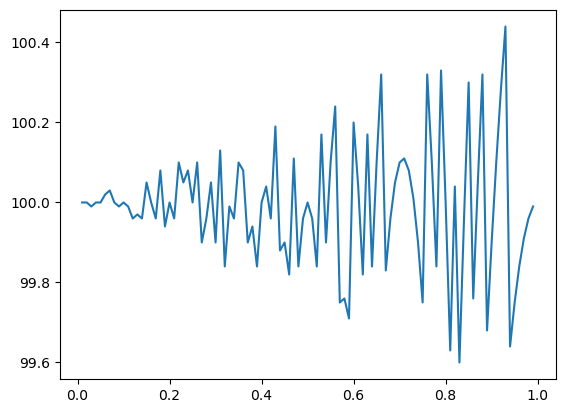

In [8]:
x_vals = df['dollars_per_rupee']
y_vals = df['rupees_end']

plt.plot(x_vals, y_vals)
plt.show()